## Programming for Data Analysis - Project 2021
---
Jody Bradley (G00387878@gmit.ie)

### Assignment
- Create a data set by simulating a real-world phenomeon, modeled and synthesised using Python. 
- Choose a real world phenomenon that can be measured and for which at least 100 data points can be collected over at least four different variables.
- Investigate the types of variables involved, their likely distributions and their relationships with each other.
- Synthesis / simulate a data set as closely matching their properties as possible. 
- Detail your research and implement the simulation in a Jupyter notebook - the data itself can simply be displated in an output cell within the notebook.

### Introduction




### Generating synthetic data with Scikit-Learn

https://python-course.eu/machine-learning/artificial-datasets-with-scikit-learn.php



### The dataset
https://archive-beta.ics.uci.edu/ml/datasets/palmer+penguins-3

The Palmer penguins dataset was collected for research that was conducted as part of the Palmer Station, Antarctica, Long-Term Ecological Research program. The purpose of the research was to study Antarctic penguins’ foraging behavior and its relationship with environmental variability.

The dataset comprises data for three species of penguin: Adélie (152 penguins), Gentoo (124 penguins), and Chinstrap (68 penguins) giving a total sample size of 344.


In [29]:
# import pandas.
import pandas as pd

# load the students data set.
df = pd.read_csv('penguins.csv')

# View data.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


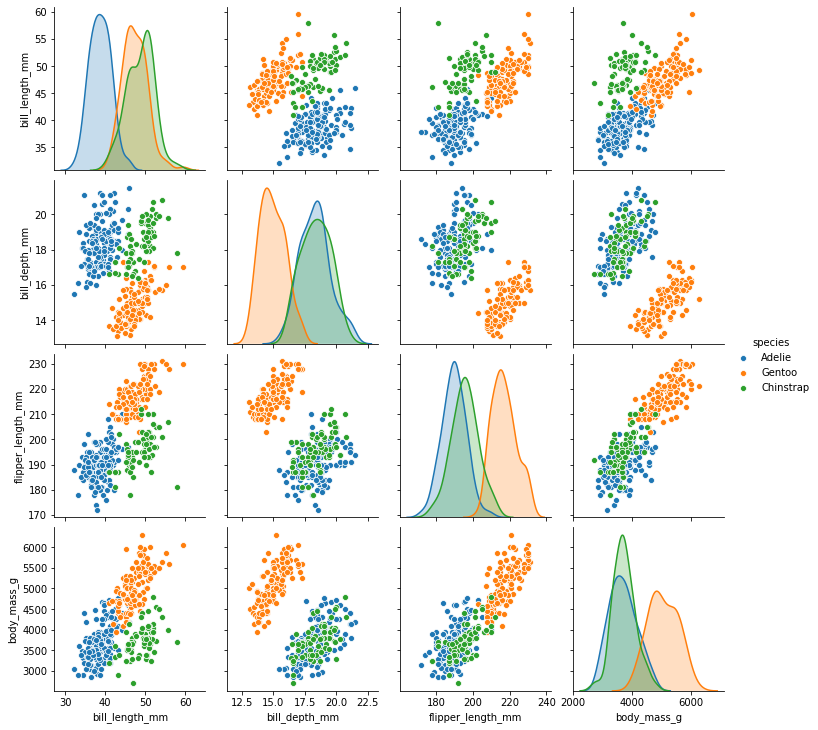

In [30]:
sns.pairplot(df, hue='species')